# PySpark data investigation
---

## Tema de interés
--- 


## Dataset:
---


## Análisis con PySpark
--- 


> Note that to run this notebook, you'll need to install some dependencies. It's HIGHLY suggested to run this command to actually install it in a virtual environment by following this command:

`python3 -m venv venv && source venv/bin/activate && pip install findspark pyspark matplotlib seaborn`

In [1]:
import findspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count

from os import path

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
findspark.init()
findspark.find()

'/Users/alonsopedreromartinez/Documents/GitHub/Proyecto-Big-Data-PySpark/Proyecto | lectura, escritura, archivos de Big Data PySpark/act_1_big_data/lib/python3.12/site-packages/pyspark'

In [3]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/26 22:41:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
PATH = "../files/"
FILE = "train.csv"

In [5]:
class FileManagement():
    def open_csv_file(self, PATH_input : str, FILE_input : str):
        """
        This method opens a csv file with pyspark
        """
        csv_df = spark.read.csv(
            path.join(PATH_input, FILE_input),
            header=False,
            inferSchema=True,
            multiLine=True,
            escape="\"",
            quote="\""
        )
        csv_df = csv_df.withColumnRenamed("_c0", "polarity") \
            .withColumnRenamed("_c1", "title") \
            .withColumnRenamed("_c2", "text")

        csv_df.show(truncate=20)

        return csv_df

In [ ]:
class StatisticalAnalysis():
    def dataset_dimensions(self, df_input):
        print("columns in the dataset:", len(df_input.columns))
        print("rows in the dataset:", df_input.count())
    
    def schema_information(self, df_input):
        """
        This method shows the current schema of the data.
        """
        df_input.printSchema()

    def descriptive_statistics(self, df_input):
        """
        This method shows the descriptive statistics of the data.
        """
        df_input.summary().show(truncate=False)
    
    def missing_values_table(self, df_input):
        """
        This method shows the missing values and displays a table.
        """
        df_missing_values = df_input.select([count(when(col(c).isNull() | isnan(c) | (col(c) == ""), c)).alias(c) for c in df_input.columns])
        df_missing_values.show()

    def missing_values_plot(self, df_input):
        """
        This method shows the missing values and plots them.
        """
        df_missing_values = df_input.select([count(when(col(c).isNull() | isnan(c) | (col(c) == ""), c)).alias(c) for c in df_input.columns]).toPandas()

        df_missing_values = df_missing_values.T.reset_index()
        df_missing_values.columns = ["column", "missing_count"]

        plt.figure(figsize=(8,5))
        sns.barplot(x="column", y="missing_count", data=df_missing_values)
        plt.title("Missing Values per Column")
        plt.show()


In [7]:
fileManagement = FileManagement()

In [8]:
df_reviews = fileManagement.open_csv_file(PATH, FILE)

+--------+--------------------+--------------------+
|polarity|               title|                text|
+--------+--------------------+--------------------+
|       2|Stuning even for ...|This sound track ...|
|       2|The best soundtra...|I'm reading a lot...|
|       2|            Amazing!|This soundtrack i...|
|       2|Excellent Soundtrack|I truly like this...|
|       2|Remember, Pull Yo...|If you've played ...|
|       2|an absolute maste...|I am quite sure a...|
|       1|        Buyer beware|This is a self-pu...|
|       2|      Glorious story|I loved Whisper o...|
|       2|    A FIVE STAR BOOK|I just finished r...|
|       2|Whispers of the W...|This was a easy t...|
|       1|          The Worst!|A complete waste ...|
|       2|          Great book|This was a great ...|
|       2|          Great Read|I thought this bo...|
|       1|           Oh please|I guess you have ...|
|       1|Awful beyond belief!|I feel I have to ...|
|       1|Don't try to fool...|It's glaringly 

In [9]:
statisticalAnalysis = StatisticalAnalysis()

In [10]:
statisticalAnalysis.dataset_dimensions(df_reviews)

columns in the dataset: 3


rows in the dataset: 3600000


In [11]:
statisticalAnalysis.schema_information(df_reviews)

root
 |-- polarity: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- text: string (nullable = true)



In [12]:
statisticalAnalysis.descriptive_statistics(df_reviews)

25/04/26 22:41:23 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
25/04/26 22:41:25 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+-------+------------------+--------------------------------+---------------------------------------------------------------------------------------------------------------+
|summary|polarity          |title                           |text                                                                                                           |
+-------+------------------+--------------------------------+---------------------------------------------------------------------------------------------------------------+
|count  |3600000           |3599952                         |3600000                                                                                                        |
|mean   |1.5               |NaN                             |NULL                                                                                                           |
|stddev |0.5000000694444666|NaN                             |NULL                                                                 

In [13]:
statisticalAnalysis.missing_values_table(df_reviews)

+--------+-----+----+
|polarity|title|text|
+--------+-----+----+
|       0|   50|   0|
+--------+-----+----+



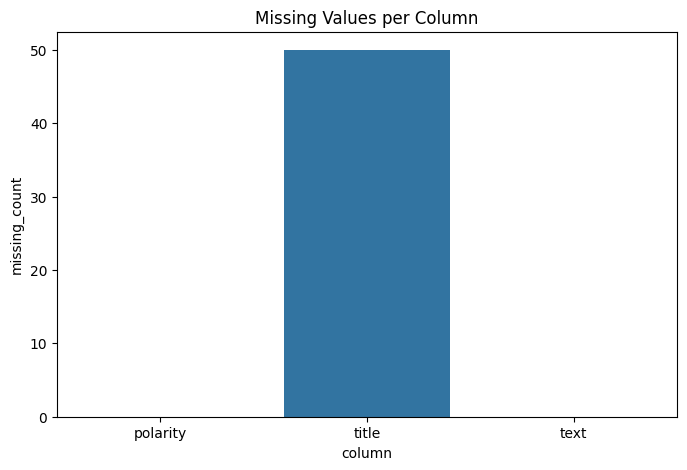

In [14]:
statisticalAnalysis.missing_values_plot(df_reviews)